<a href="https://colab.research.google.com/github/weathon/healthy-diet/blob/main/food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import tensorflow as tf
import numpy as np
import pandas as pd
from PIL import Image
import pylab

In [3]:
# # Re-download the data.zip, run as needed
# !touch ~/.ssh/known_hosts
# !scp -o PreferredAuthentications="password" -o StrictHostKeyChecking=no wg25r@files.weasoft.com:/mnt/blockstorage/user/data.zip data.zip
# !unzip data.zip
!wget files.weasoft.com:9999/data.zip

--2022-12-31 20:25:29--  http://files.weasoft.com:9999/data.zip
Resolving files.weasoft.com (files.weasoft.com)... 66.42.65.160
Connecting to files.weasoft.com (files.weasoft.com)|66.42.65.160|:9999... connected.
HTTP request sent, awaiting response... 200 OK
Length: 789758096 (753M) [application/zip]
Saving to: ‘data.zip’

data.zip            100%[===================>] 753.17M  32.1MB/s    in 19s     

2022-12-31 20:25:49 (38.6 MB/s) - ‘data.zip’ saved [789758096/789758096]



In [4]:
!unzip data.zip

Streaming output truncated to the last 5000 lines.
  inflating: train_images/train_images/73b762640c.jpg  
  inflating: train_images/train_images/73cbfaeb8a.jpg  
  inflating: train_images/train_images/73d0fee782.jpg  
  inflating: train_images/train_images/73e0c576d4.jpg  
  inflating: train_images/train_images/73e29df778.jpg  
  inflating: train_images/train_images/73f4a72817.jpg  
  inflating: train_images/train_images/73f5778696.jpg  
  inflating: train_images/train_images/73fb4c1e8a.jpg  
  inflating: train_images/train_images/74033b7ff1.jpg  
  inflating: train_images/train_images/740a768464.jpg  
  inflating: train_images/train_images/7411eb3fdb.jpg  
  inflating: train_images/train_images/74146be797.jpg  
  inflating: train_images/train_images/74176e5066.jpg  
  inflating: train_images/train_images/741b7f61e2.jpg  
  inflating: train_images/train_images/741ff5d545.jpg  
  inflating: train_images/train_images/742c9dfbdd.jpg  
  inflating: train_images/train_images/7431ac0d4c.jpg

### Load Data

In [10]:
df = np.array(pd.read_csv("train_img.csv"))
set(df[:,1])
black_list = ["boisson-au-glucose-50g","mayonnaise",]
renaming = { 'bread-french-white-flour':"bread",
 'bread-sourdough':"bread",
 'bread-white':"bread",
 'bread-whole-wheat':"bread",
 'bread-wholemeal':"bread",
 "white-coffee-with-caffeine": "coffee",
 "espresso-with-caffeine" : "coffee",
 "mixed-vegetables":"vegetables",
 "mixed-salad-chopped-without-sauce":"vegetables",
 "hard-cheese":"cheese",
 "soft-cheese":"cheese",
 "water-mineral":"water",
 "tea-grean":"tea",
 "gruyere":"cheese"
 }

In [ ]:
X = []
Y = []
for i in df:
    if i[1] in black_list:
      continue
    if i[1] in renaming.keys():
      i[1] = renaming[i[1]] 
    X.append(np.array(Image.open(f"train_images/train_images/{i[0]}").resize((128,128))))
    Y.append(i[1])

In [ ]:
Y_mapping = {}
l = 0
for i in range(len(Y)):
    try:
        tmp = Y_mapping[Y[i]]
        Y[i] = tmp
    except:
        Y_mapping[Y[i]] = l
        Y[i] = l
        l+=1

In [ ]:
for i in range(len(Y)):
    tmp = np.zeros_like([0]*(l+1))
    tmp[Y[i]] = 1
    Y[i] = tmp

### Model

In [ ]:
model = tf.keras.Sequential([
    # tf.keras.layers.Input(shape=(128,128,3)),
    # tf.keras.layers.Conv2D(32,(3,3),activation="relu"),
    # tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
    # # tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
    # tf.keras.layers.MaxPooling2D(),
    # tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
    # tf.keras.layers.Conv2D(128,(3,3),activation="relu"),
    # # tf.keras.layers.Conv2D(128,(3,3),activation="relu"), works much better without these layers 
    # tf.keras.layers.MaxPooling2D(),
    # # tf.keras.layers.Conv2D(128,(3,3),activation="relu"),
    # tf.keras.layers.MaxPooling2D(),
    # tf.keras.layers.Dense(4096, activation="relu"),
    # tf.keras.layers.Dense(2048, activation="relu"),
    # tf.keras.layers.Flatten(),
    tf.keras.applications.efficientnet_v2.EfficientNetV2L(include_top=0, input_shape=(128,128,3)),
    tf.keras.layers.Dense(1024, activation="relu"),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    # tf.keras.layers.Dense(len(Y_mapping.keys())+1, activation="relu"),
    tf.keras.layers.Dense(len(Y_mapping.keys())+1, activation="softmax")
])

In [ ]:
model.build(input_shape=(128,128,3))
model.summary()

ValueError: ignored

In [ ]:
X = np.array(X)
Y = np.array(Y)
model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics="accuracy")

In [ ]:
random = np.arange(len(Y)) 
np.random.shuffle(random)
X = X[random]
Y = Y[random]
history = model.fit(X, Y, epochs=30, validation_split=0.05)

Epoch 1/30


ValueError: ignored

In [ ]:
model.save("model_2.h5")

In [ ]:
!ls -l -h model_2.h5

-rw-r--r-- 1 root root 1.2G Dec 31 07:16 model_2.h5


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp model_2.h5 drive/MyDrive/FoodMode_2.h5

In [ ]:
reverseMap = {}
for i in Y_mapping.keys():
  reverseMap[Y_mapping[i]] = i

1/1 [==============================] - 0s 17ms/step
mixed-vegetables


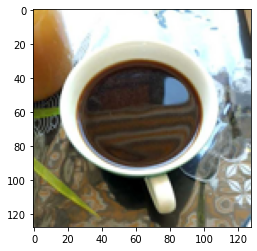

In [ ]:
id = 90
image = os.listdir("test_images/test_images/")[id]
print(reverseMap[np.argmax(model.predict(np.array([
    np.array(Image.open("test_images/test_images/"+image).resize((128,128)))
    ]))[0][:-1])])#aaput kes in predict
pylab.imshow(Image.open("test_images/test_images/"+image).resize((128,128)))


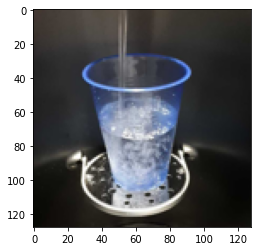